In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.nn.functional as F
import os
from tqdm import tqdm

class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(784, 256) 
        self.fc2 = nn.Linear(256, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc(x)) 
        x = torch.relu(self.fc2(x))
        x = self.out(x)  
        return x

model = SingleLayerNN()


criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)  


In [2]:
torch.manual_seed(7)

In [3]:
train_dataset = MNIST(os.getcwd(), train=True, download=True, transform=[transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
x_train = train_dataset.data / 255.0
y_train = F.one_hot(train_dataset.targets, num_classes=10)
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_train = x_train.view(-1, 784)
dtrain = torch.utils.data.TensorDataset(x_train, y_train)
trainloader = DataLoader(dtrain, batch_size=64, shuffle=True)

C:\Users\ianey\AppData\Local\Temp\ipykernel_9484\2182951934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)
C:\Users\ianey\AppData\Local\Temp\ipykernel_9484\2182951934.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)


In [4]:
def neuronalNeuralBalance(inl, oul):

    ninc = torch.zeros_like(inl.weight)
    noul = torch.zeros_like(oul.weight)

    for i in range(inl.weight.data.shape[0]):
        inc = torch.sum(torch.abs(inl.weight.data[i])).item()
        outg = torch.sum(torch.abs(oul.weight.data[:,i])).item()

        # outg = outg / float(len(oul.weight.data[:,i]))
        # inc = inc / float(len(inl.weight.data[i]))

        opt = np.sqrt(outg/inc)

        ninc[i] = inl.weight.data[i]*opt
        noul[:, i] = oul.weight.data[:,i]/opt

    diff = (torch.sum(torch.abs(inl.weight.data - ninc)).item(), torch.sum(torch.abs(oul.weight.data-noul)).item())

    inl.weight.data = ninc
    oul.weight.data = noul

    return diff



In [5]:
def neuralBalance(inl, oul, order=1):
    shape = inl.weight.shape[0]
    norm = []

    prev = torch.linalg.norm(inl.weight, dim=1, ord=order)
    out = torch.linalg.norm(oul.weight, dim = 0, ord=order)

    opt = torch.sqrt(out/prev)
    inl.weight.data = inl.weight*opt.unsqueeze(1)
    oul.weight.data = oul.weight/opt

In [6]:
model = model.to('cuda')
lay = []
for n, i in model.named_children():
    print(type(i).__name__)
    if type(i).__name__ == "Linear":
        lay.append((n, i))

num_epochs = 20  
for epoch in range(num_epochs):
    for b in tqdm(trainloader):
        xt, y = b[0].to('cuda'), b[1].to('cuda')
        optimizer.zero_grad() 
        outputs = model(xt)  
        loss = criterion(outputs, y) 
        
        loss.backward() 
        optimizer.step() 
    
    
    for i in range(len(lay)):
        if i > 0 and i <= len(lay)-1:
            di = neuronalNeuralBalance(lay[i-1][1], lay[i][1])
            while(di[0]+di[1] > .001):
                di = neuronalNeuralBalance(lay[i-1][1], lay[i][1])

    print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')


Linear
Linear
Linear


100%|██████████| 938/938 [00:02<00:00, 456.80it/s]


Epoch 0/20, Loss: 0.009924041107296944


100%|██████████| 938/938 [00:02<00:00, 434.81it/s]


Epoch 1/20, Loss: 0.09014387428760529


100%|██████████| 938/938 [00:02<00:00, 429.05it/s]


Epoch 2/20, Loss: 0.09051069617271423


100%|██████████| 938/938 [00:02<00:00, 450.13it/s]


Epoch 3/20, Loss: 0.09073692560195923


100%|██████████| 938/938 [00:02<00:00, 444.47it/s]


Epoch 4/20, Loss: 0.09039825946092606


100%|██████████| 938/938 [00:02<00:00, 452.54it/s]


Epoch 5/20, Loss: 0.09015291929244995


100%|██████████| 938/938 [00:02<00:00, 456.38it/s]


Epoch 6/20, Loss: 0.09038278460502625


100%|██████████| 938/938 [00:02<00:00, 445.41it/s]


Epoch 7/20, Loss: 0.0903036892414093


100%|██████████| 938/938 [00:02<00:00, 394.57it/s]


Epoch 8/20, Loss: 0.08959212154150009


100%|██████████| 938/938 [00:02<00:00, 465.36it/s]


Epoch 9/20, Loss: 0.09111323207616806


100%|██████████| 938/938 [00:02<00:00, 448.37it/s]


Epoch 10/20, Loss: 0.09082509577274323


100%|██████████| 938/938 [00:02<00:00, 387.12it/s]


Epoch 11/20, Loss: 0.09127948433160782


100%|██████████| 938/938 [00:02<00:00, 391.65it/s]


Epoch 12/20, Loss: 0.09029141813516617


100%|██████████| 938/938 [00:02<00:00, 362.48it/s]


Epoch 13/20, Loss: 0.09090138971805573


100%|██████████| 938/938 [00:02<00:00, 361.59it/s]


Epoch 14/20, Loss: 0.09000147134065628


100%|██████████| 938/938 [00:03<00:00, 285.89it/s]


Epoch 15/20, Loss: 0.09026426076889038


100%|██████████| 938/938 [00:02<00:00, 334.16it/s]


Epoch 16/20, Loss: 0.09074552357196808


100%|██████████| 938/938 [00:02<00:00, 331.45it/s]


Epoch 17/20, Loss: 0.09058212488889694


100%|██████████| 938/938 [00:02<00:00, 350.21it/s]


Epoch 18/20, Loss: 0.09079857170581818


100%|██████████| 938/938 [00:03<00:00, 285.23it/s]


Epoch 19/20, Loss: 0.0902959480881691


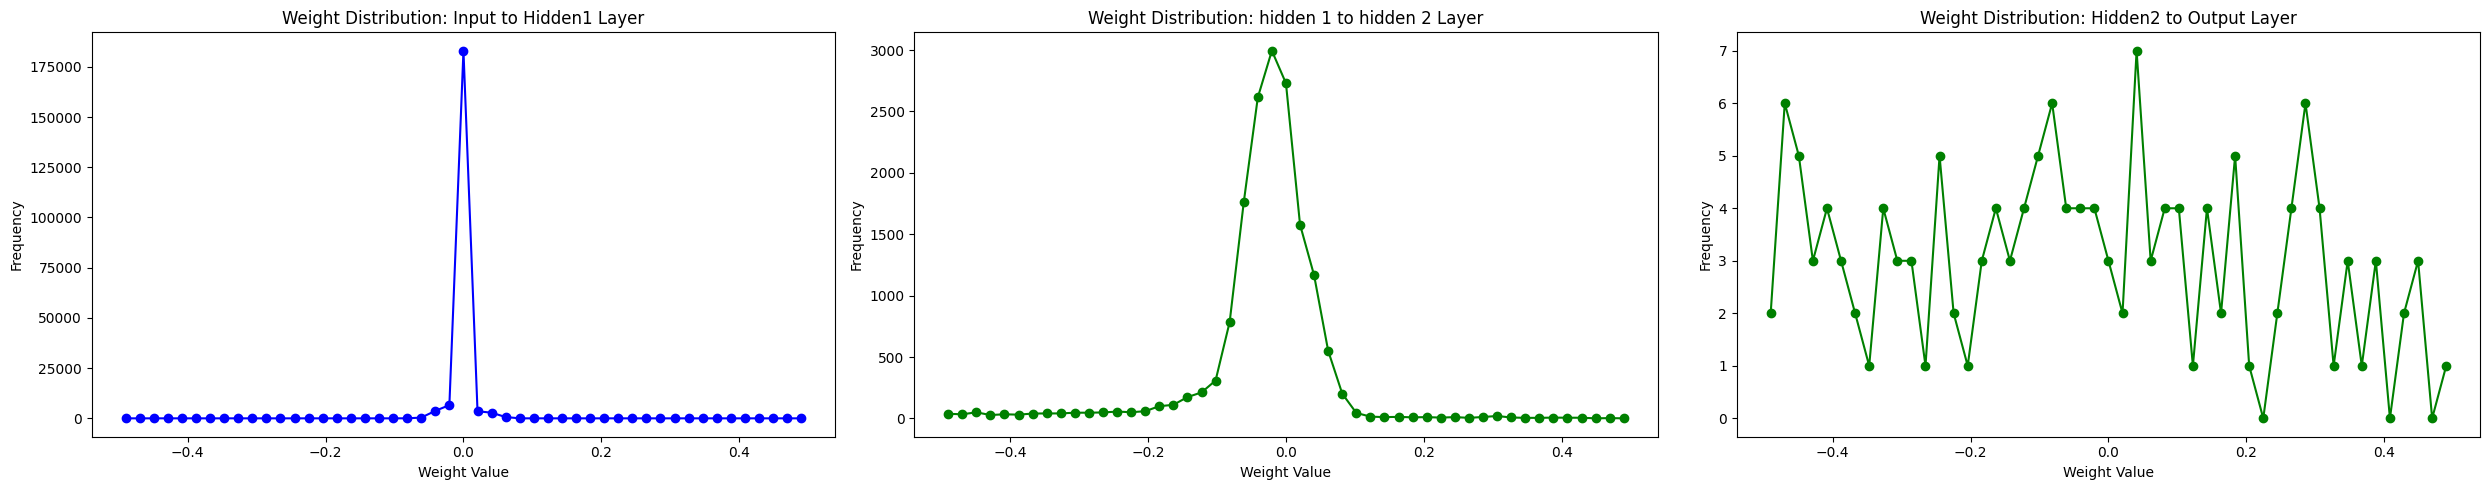

In [7]:
import matplotlib.pyplot as plt

fc_weights = model.fc.weight.cpu().detach().numpy().flatten()
fc2_weights = model.fc2.weight.cpu().detach().numpy().flatten()
out_weights = model.out.weight.cpu().detach().numpy().flatten()

bins = np.linspace(-0.5, 0.5, 50) 
fc_hist, fc_bins = np.histogram(fc_weights, bins=bins)
fc2_hist, fc2_bins = np.histogram(fc2_weights, bins=bins)
out_hist, out_bins = np.histogram(out_weights, bins=bins)

fc_bin_centers = 0.5 * (fc_bins[:-1] + fc_bins[1:])
fc2_bin_centers = 0.5 * (fc2_bins[:-1] + fc2_bins[1:])
out_bin_centers = 0.5 * (out_bins[:-1] + out_bins[1:])

plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plt.plot(fc_bin_centers, fc_hist, marker='o', linestyle='-', color='b')
plt.title('Weight Distribution: Input to Hidden1 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(fc2_bin_centers, fc2_hist, marker='o', linestyle='-', color='g')
plt.title('Weight Distribution: hidden 1 to hidden 2 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.plot(out_bin_centers, out_hist, marker='o', linestyle='-', color='g')
plt.title('Weight Distribution: Hidden2 to Output Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [8]:
import torch

def count_nonzero_weights_above_threshold(layer, threshold=0.01):
    return torch.sum(torch.abs(layer.weight) > threshold).item()

threshold_value = 0.01 

nonzero_fc1 = count_nonzero_weights_above_threshold(model.fc, threshold=threshold_value)
nonzero_fc2 = count_nonzero_weights_above_threshold(model.fc2, threshold=threshold_value)
nonzero_fc3 = count_nonzero_weights_above_threshold(model.out, threshold=threshold_value)

print(f'Number of non-zero weights greater than {threshold_value} in layer 1: {nonzero_fc1}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 1: {nonzero_fc2}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 3: {nonzero_fc3}')

Number of non-zero weights greater than 0.01 in layer 1: 17861
Number of non-zero weights greater than 0.01 in layer 1: 13696
Number of non-zero weights greater than 0.01 in layer 3: 637
